In [10]:
#Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import time

The first step, in order to the link the neutrino mass eigenstates and the neutrino flavour eigenstates, is to construct the PMNS matrix (The Leptonic mixing matrix), containing the 3 mixing angles and the cp violating complex phase angle.

$$|{\nu_\alpha}> = \sum_{k} U_{\alpha k}^{*} |{\nu_k}>$$

where:

$|{\nu_\alpha}>$ represents the neutrino flavour eigenstates (where $\alpha = e,\mu,\tau$),

$|{\nu_k}>$ represents the neutrino mass eigenstates (where $k = 1,2,3$),

and U represents the PMNS Matrix

In [11]:
#Preamble - Setting up all the necessary parameters
angles = [195, 33.44, 49 , 8.57]  #these are the 3 mixing angles and the single complex phase angle in degrees 
radian_values = np.radians(angles) #conversion to radians 

#delta_cp = 0
#delta_cp = np.radians(90)
delta_cp = radian_values[0]   #explicity writing out the angles in radians and assigning them variable names 
theta_12 = radian_values[1]
theta_23 = radian_values[2]
theta_13 = radian_values[3]

c_12 = np.cos(theta_12)  #calculating and assigning variable names to the terms we will need in the PMNS Matrix
c_23 = np.cos(theta_23)
c_13 = np.cos(theta_13)
s_12 = np.sin(theta_12)
s_23 = np.sin(theta_23)
s_13 = np.sin(theta_13)

#Consructing the PMNS matrix 
PMNS_matrix = np.array([[c_12*c_13, s_12*c_13 , s_13*np.exp(-1j*delta_cp)],
[(-s_12*c_23) - (c_12*s_23*s_13*(np.exp(1j*delta_cp))),(c_12*c_23) - s_12*s_23*s_13*np.exp(1j*delta_cp), s_23*c_13],
[(s_12*s_23) - (c_12*c_23*s_13*np.exp(1j*delta_cp)), (-c_12*s_23) - s_12*c_23*s_13*np.exp(1j*delta_cp), c_23*c_13]])

print(PMNS_matrix)

[[ 0.82514619+0.j          0.54491056+0.j         -0.14393996+0.0385686j ]
 [-0.27088   +0.02428963j  0.60732082+0.0160404j   0.7462829 +0.j        ]
 [ 0.49469383+0.02111466j -0.57773885+0.01394371j  0.64873383+0.j        ]]


## Maths

We can think of each U$_{\alpha i}$ as some fraction or arrow. The mass determines how quickly these fractions/arrows evolve over time. We will keep U$_{\alpha 1}$ fixed (blue) whilst the other evolve in reference to it, therefore the mass differences will determine how fast the two other arrows rotate.


$$|{\nu_\alpha}> = \sum_{k} U_{\alpha k}^{*} |{\nu_k}>$$

where $\alpha = e, \mu, \tau$ and $k =1,2,3$

The amplitude for a neutrino to change from $\nu_\alpha$ to $\nu_\beta$ is:
$$ Amp(\nu_\alpha (0,0) -> \nu_\beta (x,t)) = \sum_{k} U_{\alpha k}^{*} U_{\beta k} e^{-i\phi_k} $$
where $i$ represents the complex number and $\phi_k = m^2_k\frac{L}{2E}$ is the phase.

The mass eigenstates $\nu_k$ evolve by a phase factor e$^{-i\phi_k}$ as the neutrino travels. We will look at how $\nu_2$ and $\nu_3$ evolve with respect to $\nu_1$ as they travel over a distance L. This is equivalent to keeping $\nu_1$ fixed while the other two mass eigenstates $\nu_2$ and $\nu_3$ evolve with reference to it. Therefore, a phase difference occurs between $\nu_2$ and $\nu_1$, as well as between $\nu_3$ and $\nu_1$.

For $\nu_1$:  $\frac{e^{-i \phi_1}}{e^{-i \phi_1}}$ = 1

For $\nu_2$:  $\frac{e^{-i \phi_2}}{e^{-i \phi_1}}$ = $e^{-i(\phi_2 - \phi_1)}$ = $e^{-i\phi_{21}}$  = $e^{-i \Delta m^2_{21}\frac{L}{2E}}$

For $\nu_3$:  $\frac{e^{-i \phi_3}}{e^{-i \phi_1}}$ = $e^{-i(\phi_3 - \phi_1)}$ = $e^{-i\phi_{31}}$ =  $e^{-i \Delta m^2_{31}\frac{L}{2E}}$

If we include the factors of $\hbar$ and $c$ that have been set equal to 1 so far, we obtain a form which is convenient to plug in oscillation parameters: $$\phi_{jk} = \Delta m^2_{jk}\frac{L}{2E} = \Delta m^2_{jk}\frac{c^3L}{2\hbar E} \approx 2.54\frac{\Delta m_{jk}^2 L}{E} \frac{[eV^2][km]}{[GeV]}$$

where $\Delta m_{jk}^2$ are the mass squared differences in eV$^2$ with $j > k$ for normal mass ordering. L is distance travelled by the neutrino in km, and E is the neutrino energy in GeV.

## Animate

MovieWriter  unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


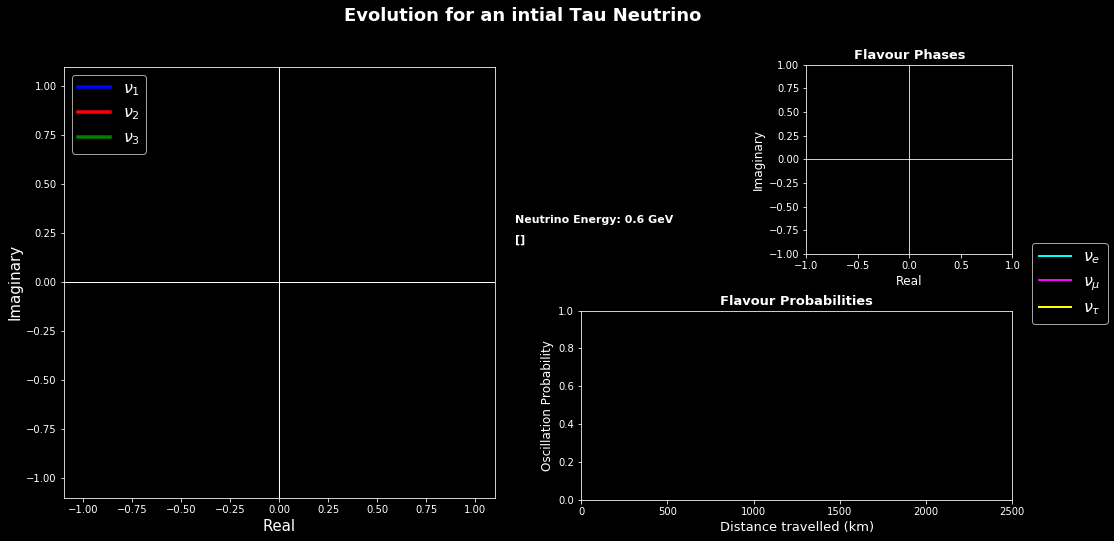

 time for code: 486.3825186559998


In [17]:
#Introduce the oscillation parameters and variables that will determine how long the animation goes on for

#The mass squared differences (These are constants)
m_21 = 7.42e-5
m_31 = 2.514e-3

#Neutrino energy in GeV (A variable we can change)
E = 0.6

#speed that I want the animation to run at, i.e v=10 is 10x speed (i.e 10km per frame) (default is 1km per frame)
v=1.5
frames = 1668 #The number of frames produced in the GIF
Length_scale = frames*v #This will be the total distance travelled by the neutrino in the animation,
#it also sets the length scale of the neutrino probabilty x-axis 


start_time = time.perf_counter() #in order to time the code

#Function whih returns a row of the PMNS matrix (1st row = initial electron row and so on)
def PMNSmatrix(row_num):
        if row_num in [1,2,3]: 
            return PMNS_matrix[row_num - 1,:]
        else:
            print('Please enter either 1,2 or 3. This corresponds to the electron, muon or tau row of the'
              ' PMNS matrix respectively')
 

 #Function which returns the phase factor    
def phase_factor2(m_ji,E,L):
        '''
        args:
            m_ji: Mass squared difference in eV^2
            E = Neutrino Energy in GeV
            L = Distance travelled by neutrino in km
        '''
        return np.exp(-1j*1.27*2*m_ji*L/E) #-i for clockwise rotation, +i for anti-clockwise rotation

#!!! Choose initial electron, muon or tau row !!!    
row_num = 3    #1,2 or 3 for electron, muon or tau row
a = np.conj(PMNSmatrix(row_num)) #conjugate of the matrix as shown in maths above
    
x1,y1 = [0,a[0].real], [0, a[0].imag] #initialising the arrows 
x2,y2 = [0,a[1].real], [0, a[1].imag]
x3,y3 = [0,a[2].real], [0, a[2].imag]

#set up the figure and add the 3 (or 4) subplots
fig = plt.figure(figsize = (17,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 4, 4)
ax3 = fig.add_subplot(2, 2, 4)
#ax4 = fig.add_subplot(2, 4, 3)
fig.subplots_adjust(hspace=0.3) 
#hspace increases the height of the pladding between subplots, wspace increases the width of this padding
plt.style.use('dark_background') #use a dark background

#Plot the title 
if row_num == 1:
    fig.suptitle('Evolution for an intial Electron Neutrino', fontsize=18, weight = 'bold')
if row_num == 2:
    fig.suptitle('Evolution for an intial Muon Neutrino', fontsize=18, weight = 'bold')
if row_num == 3:
    fig.suptitle('Evolution for an intial Tau Neutrino', fontsize=18, weight = 'bold')
    

#Set up Plot 1 (Phasor diagram representing how the mass eigenstates evolve)
limit = np.max(np.ceil(np.absolute(a)))
ax1.set_xlim(-limit,limit) 
ax1.set_ylim(-limit,limit)
ax1.axis('scaled') #scales the axis so it's a square plot
ax1.axhline(y=0,color='white', linewidth = 1) #intoduce axis lines that are visible
ax1.axvline(x=0, color='white', linewidth = 1)
ax1.set_ylabel('Imaginary', fontsize = 15)
ax1.set_xlabel('Real', fontsize = 15)
#The lines in plot 1 that will be animated 
line1, = ax1.plot(x1,y1,'b', linewidth=3.5, label = '$\u03BD_1$') #v_1 arrow 
line2, = ax1.plot(x2,y2,'r', linewidth=3.5, label = '$\u03BD_2$') #v_2 arrow
line3, = ax1.plot(x3,y3,'g', linewidth=3.5, label = '$\u03BD_3$') #v_3 arrow
ax1.legend(fontsize=16, loc = 'upper left')


#Set up plot 2 (Phasor diagram showing how the phases of the neutrino flavours evolve)
ax2.set_xlim(-1,1) 
ax2.set_ylim(-1,1)
ax2.axhline(y=0,color='white', linewidth = 0.8) #intoduce axis lines that are visible
ax2.axvline(x=0, color='white', linewidth = 0.8)
ax2.set_title('Flavour Phases', fontsize = 13, weight = 'bold')
ax2.set_xlabel('Real', fontsize = 12)
ax2.set_ylabel('Imaginary', fontsize = 12)
line4, = ax2.plot([], [], color = 'aqua', lw = 2, label = '$\u03BD_e$')
line5, = ax2.plot([], [], color = 'magenta', lw = 2, label = '$\u03BD_{\u03BC}$')
line6, = ax2.plot([], [], color = 'yellow', lw = 2, label = '$\u03BD_{\u03C4}$')
ax2.legend(loc = 'upper right',fontsize=16, bbox_to_anchor=(1.5, 0.1))#bbox_to_anchor allows us to move the legend to a desired location

#Set up plot 3
ax3.set_xlim(0,Length_scale) #20,000 will allow us to see one full period of the wave
ax3.set_ylim(0,1.0)
ax3.set_title('Flavour Probabilities', fontsize = 13, weight = 'bold')
ax3.set_xlabel('Distance travelled (km)', fontsize = 13)
ax3.set_ylabel('Oscillation Probability', fontsize = 12)
line7, = ax3.plot([], [], color = 'aqua', lw = 1.5, label = '$\u03BD_e$')
line8, = ax3.plot([], [], color = 'magenta', lw = 1.5, label = '$\u03BD_{\u03BC}$')
line9, = ax3.plot([], [], color = 'yellow', lw = 1.5, label = '$\u03BD_{\u03C4}$')
#ax3.legend(loc = 'upper right',fontsize=18, bbox_to_anchor=(1.3, 1.4))

#Set up Plot 4 if required
#ax4.set_xlim(0,Length_scale) 
#ax4.set_ylim(-180,180)
#ax4.set_title('Flavour Phases', fontsize = 13, weight = 'bold')
#ax4.set_xlabel('Distance travelled (km)', fontsize = 13)
#ax4.set_ylabel('Phase', fontsize = 12)
#line10, = ax4.plot([], [], color = 'aqua', lw = 1.5, label = '$\u03BD_e$')
#line11, = ax4.plot([], [], color = 'magenta', lw = 1.5, label = '$\u03BD_{\u03BC}$')
#line12, = ax4.plot([], [], color = 'yellow', lw = 1.5, label = '$\u03BD_{\u03C4}$')


#Text that will be displayed on the Animation
ax1.text(1.2,0.3, r'Neutrino Energy: {Energy} GeV'.format(Energy=E), fontsize=11, weight = 'bold') 
text = ax1.text(1.2, 0.2, r'Distance Travelled: ',fontsize=11, weight = 'bold')
#Will need to move the positions of these if a fourth subplot is added


#The init function initializes the data and also sets the axis limits.
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    text.set_text([])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    line7.set_data([], [])
    line8.set_data([], [])
    line9.set_data([], [])
    
    return line1, line2, line3, text, line4, line5, line6, line7, line8, line9 

#create empty lists that we will append values to after each frame, to then plot the phases and probabilities
phases_list_electron=[] 
phases_list_muon=[]
phases_list_tau=[]
percentage_list_electron=[]
percentage_list_muon=[]
percentage_list_tau=[]
lengths_list = []

#If adding the fourth plot
phases_list_electron_2=[]
phases_list_muon_2=[]
phases_list_tau_2=[]


#Function to animate
def animate(L):
    
    rate_21 = phase_factor2(m_21,E,L*v)
    rate_31 = phase_factor2(m_31,E,L*v)

    x = a[1]*rate_21
    y = a[2]*rate_31
    
    x1,y1 = [0,a[0].real], [0, a[0].imag]
    x2,y2 = [0,x.real], [0, x.imag]
    x3,y3 = [0,y.real], [0, y.imag]

    line1.set_data(x1, y1)
    line2.set_data(x2, y2) 
    line3.set_data(x3, y3) 
    
    lengths_list.append((L*v))
    
    #Phase and neutrino probability 
    a_new = np.array([[a[0]],[x],[y]]) #This is the U_(ak)^* e^-(i phi) part
    for num in [1,2,3]:
        U_bk = PMNSmatrix(num) #This is the U_(beta)k
        result = float((np.absolute((np.dot(U_bk,a_new))))**2)
        phase = np.dot(U_bk,a_new)
        x_phase=phase.real
        y_phase=phase.imag
        x_1,y_1 = [0,x_phase], [0, y_phase]
        gamma = math.atan2(y_phase,x_phase)
        gamma_deg = np.degrees(gamma)

        if num == 1:            
            line4.set_data(x_1,y_1)
            percentage_list_electron.append(result)
            line7.set_data(lengths_list,percentage_list_electron)
            
            #If adding fourth plot
            #phases_list_electron_2.append(gamma_deg)
            #line10.set_data(lengths_list,phases_list_electron_2)
        if num == 2:
            line5.set_data(x_1,y_1) 
            percentage_list_muon.append(result)
            line8.set_data(lengths_list,percentage_list_muon)
            
            #phases_list_muon_2.append(gamma_deg)
            #line11.set_data(lengths_list,phases_list_muon_2)
        if num == 3:
            line6.set_data(x_1,y_1)
            percentage_list_tau.append(result)
            line9.set_data(lengths_list,percentage_list_tau)
            
            #phases_list_tau_2.append(gamma_deg)
            #line12.set_data(lengths_list,phases_list_tau_2)
    
    text.set_text('Distance Travelled: {Length} km'.format(Length=L*v))
    
    return line1, line2, line3, text, line4, line5, line6, line7, line8, line9,
#add line10, line11, line12, above if using plot 4

#animate
animation = FuncAnimation(fig, animate, frames= frames, 
                          init_func=init, interval=20, blit=False) 

#save animation
animation.save('Initial_Tau_Animation_Slow.gif', writer='')


plt.show()

#This just times the code
end_time = time.perf_counter()  
total_time = end_time-start_time
print(f' time for code: {total_time}')